# Practice Assignment - Part 1: Analyzing wildfire activities in Australia

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

## Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


In [2]:
#import data
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [7]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int64
Month                                    int64
dtype: object

**TASK 1.1: Let's try to understand the change in average estimated fire area over time**

(use pandas to plot)


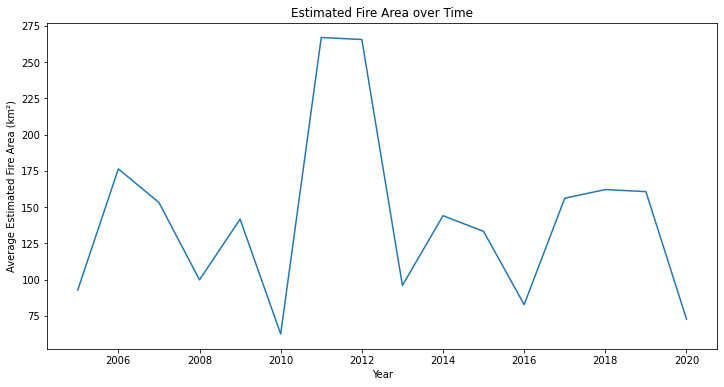

In [8]:
 plt.figure(figsize=(12, 6))
df_new=df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

**TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.**


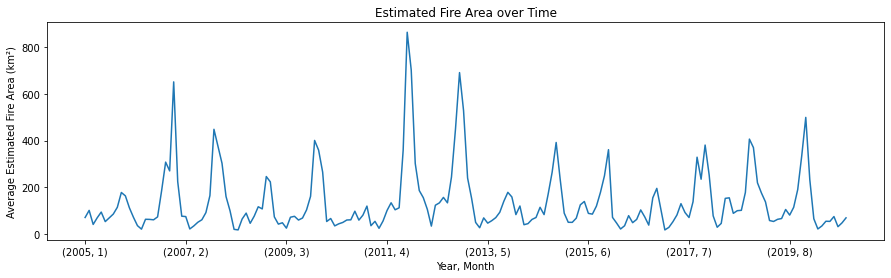

In [9]:
df_new=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values,figsize=(15, 4))
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


**TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot**


before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)

In [10]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

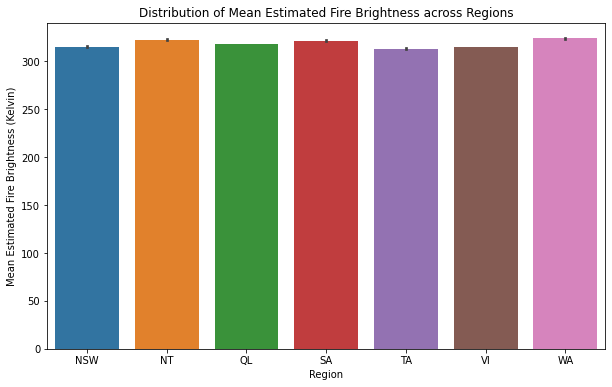

In [11]:
#The sns.barplot function calculates a summary statistic for each category. 
#by default, it calculates the mean. 

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

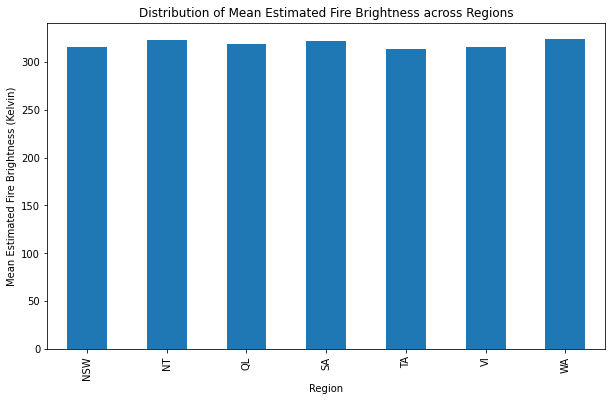

In [12]:
# Extra DS (using pandas dataframe):
df_new=df.groupby(['Region'])['Mean_estimated_fire_brightness'].mean()
df_new.plot(kind='bar', figsize=(10,6))
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

**TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions**<br> we will develop a pie chart for this

In [13]:
region_counts = df.groupby('Region')['Count'].sum()
region_counts.head()

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
Name: Count, dtype: int64

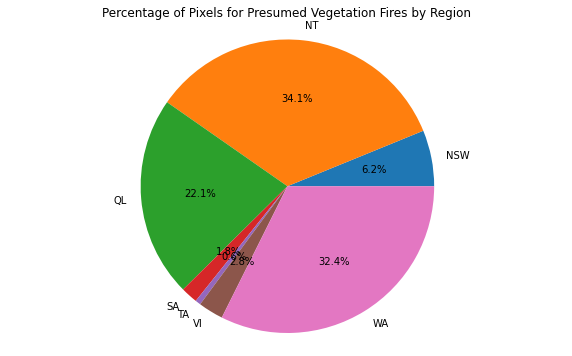

In [14]:
# using matplotlib library
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

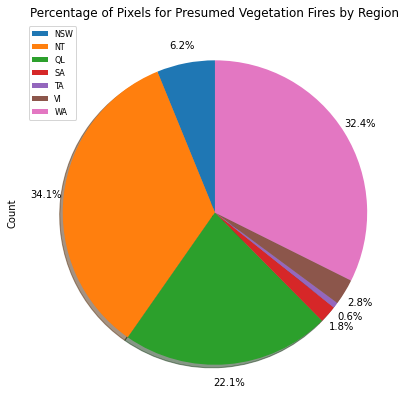

In [15]:
# Extra DS (using pandas dataframe):
# autopct create %, start angle represent starting point
region_counts.plot(kind='pie',
                            figsize=(10, 7),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90°
                            shadow=True,       # add shadow 
                            labels=None,  
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
#plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=region_counts.index, loc='upper left', fontsize=8) 

plt.show()

**TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI** 

remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


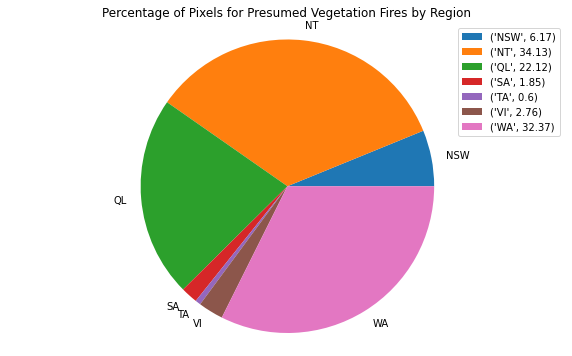

In [16]:
# using matplotlib library
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

**TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness**<br> Using Matplotlib to create the histogram

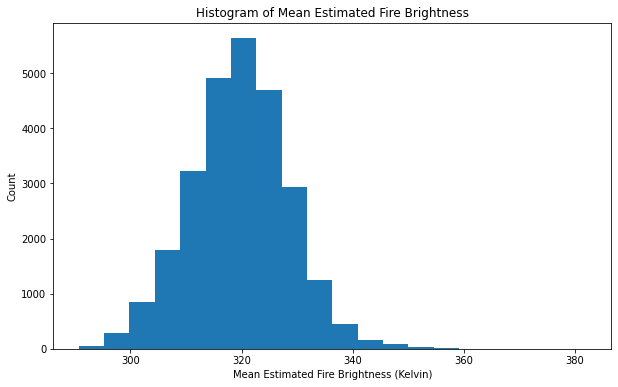

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

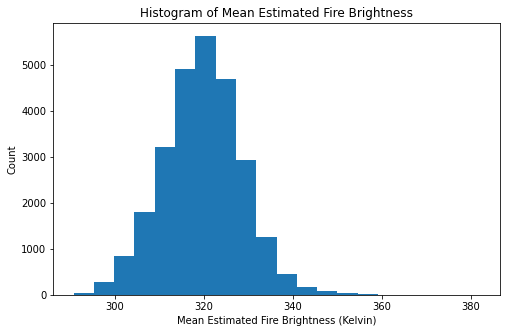

In [18]:
# Extra DS (using pandas dataframe):
df['Mean_estimated_fire_brightness'].plot(kind='hist', figsize=(8, 5), bins=20)

plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

**TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue**


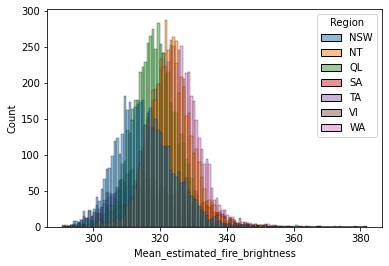

In [39]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

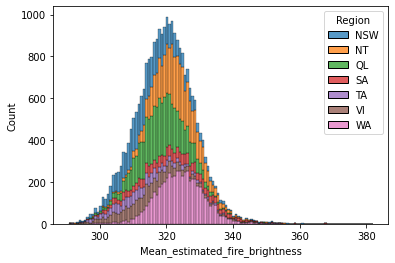

In [40]:
### looks better!, now include the parameter `multiple='stack'` in the histplot() and see the difference. 
#Include labels and titles as well
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

<AxesSubplot:ylabel='Frequency'>

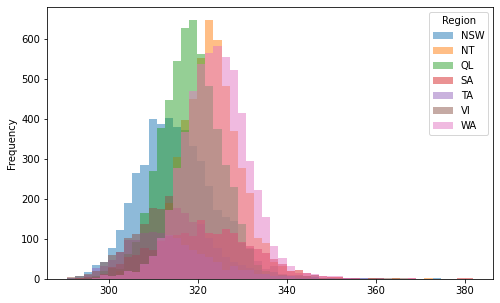

In [41]:
# Extra DS (using pandas dataframe):
df_transposed = df.pivot(index=None, columns='Region', values='Mean_estimated_fire_brightness')
df_transposed.plot(kind='hist', figsize=(8, 5), bins=50, alpha=0.5)

**TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?**


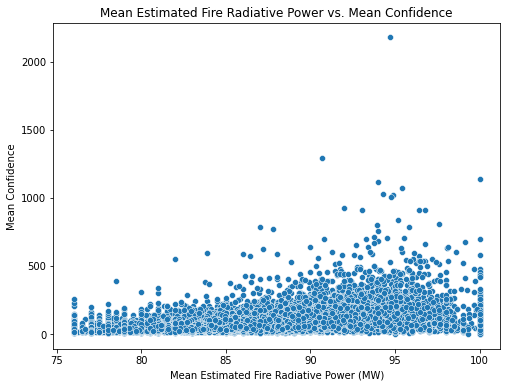

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

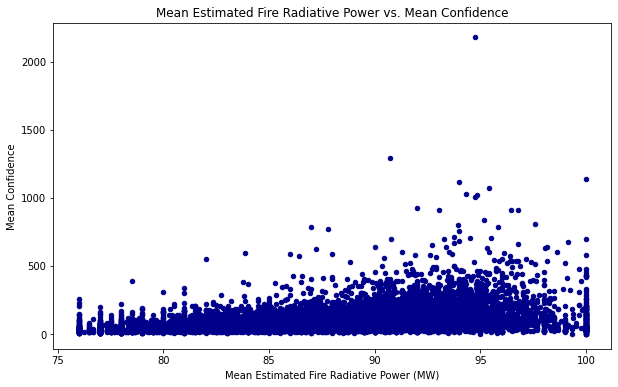

In [43]:
# Extra DS (using pandas dataframe):
df.plot(kind='scatter', x='Mean_confidence', y='Mean_estimated_fire_radiative_power', figsize=(10, 6), color='darkblue')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

**TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium**
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [48]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [49]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)
# display world map
Aus_map

In [50]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)